In this example, we run the whole TACO workflow for the LrP biosensor screening as described in the manuscript.

In [1]:
import pathlib
import json
import pandas as pd

import taco
from taco.multina import analyze_multina_data
from taco.conjugation import ConjugationProject

In the first steps, a TACO project is created. It can then be used to generate a template file, in which the researcher can put information about the constructs to be generated.

In [2]:
tp = taco.create_project('lrp-lib')

In [3]:
tp.generate_construct_template(
    filename=pathlib.Path('templates', 'constructs_info_template.xlsx'), 
    properties=['backbone', 'primerA', 'primerB'],
)

After the information was added, the template can be parsed into the TACO project. From there, a template for counting clones is generated.

In [4]:
tp.read_construct_input(pathlib.Path('results', 'constructs_info.xlsx'))

96 constructs added to the project. 0 duplicates were skipped.


In [5]:
tp.generate_transformation_template(pathlib.Path('templates', 'clone_counting_template.xlsx'))

After counting the clones, data can be added to the project and another template for colony PCR can be generated.

In [6]:
tp.read_transformation_input(pathlib.Path('results', 'clone_counting.xlsx'))

273 clones were added to the project.


In [7]:
tp.generate_pcr_template(
    filename=pathlib.Path('templates', 'colonypcr_template.xlsx'),
    max_clones=4, use_mtp=True,
)

After performing colony PCR, we utilize a TACO plugin-in for analysis of MultiNA data to check if our DNA fragement sizes are within the expected range. The results are then added to the project.

In [8]:
analyze_multina_data(
    datafiles={
        1: pathlib.Path('results', 'colPCR1_results.csv'), 
        2: pathlib.Path('results', 'colPCR2_results.csv'),
    }, 
    templatefile=pathlib.Path('templates', 'colonypcr_template.xlsx'),
    targetfile=pathlib.Path('templates', 'colony_pcr_target_lengths.xlsx'),
    resultfile=pathlib.Path('results', 'colony_pcr_results.xlsx'),
    window=20,
)

184 clones were analyzed. PCR from 176 clones yielded a fragment within target length ± 10.0.


In [9]:
tp.read_pcr_input(pathlib.Path('results', 'colony_pcr_results.xlsx'))

PCR data for 184 clones added


Sequencing results, if available, can also be added to the project.

In [10]:
# 'Custom' seq data, not generated in this Taco workflow since sequencing was done after conjugation
tp.read_seq_input(pathlib.Path('results', 'sequencing_results.xlsx'))

SEQ data for 45 clones added


The function `store_clones` can be used to define positions for each clone, to be used as a template for preparing storage plates. The researcher can decide to only store validated clones, i.e., with positive colony PCR, positive sequencing result, or both. The function `get_validated_clones` can be used to show such clones.

In [11]:
tp.store_clones(pcr=True, seq=False)

In [12]:
tp.get_validated_clones(pcr=True, seq=False).sample(5)

,construct,backbone,primerA,primerB,clone,agar_plate_number,agar_plate_position,pcr_result,seq_result,storage_plate_number,storage_plate_position
97,pEC-Tmob18_Lrp_eYFP_p225_231,pEC-Tmob18_Lrp_eYFP,225,231,pEC-Tmob18_Lrp_eYFP_p225_231_1,4.0,7.0,success,success,1.0,B7
239,pEC-Tmob18_Lrp_eYFP_p226_236,pEC-Tmob18_Lrp_eYFP,226,236,pEC-Tmob18_Lrp_eYFP_p226_236_1,9.0,8.0,success,None,2.0,F5
186,pEC-Tmob18_Lrp_eYFP_p221_235,pEC-Tmob18_Lrp_eYFP,221,235,pEC-Tmob18_Lrp_eYFP_p221_235_1,8.0,3.0,success,None,2.0,B2
78,pEC-Tmob18_Lrp_eYFP_p221_231,pEC-Tmob18_Lrp_eYFP,221,231,pEC-Tmob18_Lrp_eYFP_p221_231_2,4.0,3.0,success,success,1.0,B6
76,pEC-Tmob18_Lrp_eYFP_p220_231,pEC-Tmob18_Lrp_eYFP,220,231,pEC-Tmob18_Lrp_eYFP_p220_231_4,4.0,2.0,success,None,1.0,H5


For a conjugation process, we can derive a `ConjugationProject` from our `TacoProject`. The new project provides additional functionality to aid in the conjugation process and keeps the link between shuttle and target organism. Templates for the conjugation process and subsequent growth tests can be generated and the result added back to the project.

In [13]:
cp = ConjugationProject(tp)
cp.generate_conjugation_template(
    filename=pathlib.Path('templates', 'conjugation_template.xlsx'),
    number_of_plates=1,
    pcr_positive=True,
    seq_positive=False)

In [14]:
cp.read_conjugation_result(pathlib.Path('results', 'conjugation_results.xlsx'))

384 conjugation clones were added to the project.


In [15]:
cp.generate_growth_template(
    filename=pathlib.Path('templates', 'growth_template.xlsx'),
    max_clones=4, use_mtp=True
)

In [16]:
cp.read_growth_input(filename=pathlib.Path('results', 'growth_results.xlsx'))

Growth data for 220 clones added


In [17]:
cp.store_clones()

In [18]:
cp.get_validated_clones().sample(5)

,construct,clone,origin,conjugation_plate_number,conjugation_position,growth_result,storage_plate_number,storage_plate_position
260,pEC-Tmob18_Lrp_eYFP_p225_235,pEC-Tmob18_Lrp_eYFP_p225_235_Conj_1,pEC-Tmob18_Lrp_eYFP_p225_235_1,1,B9,success,1.0,H5
289,pEC-Tmob18_Lrp_eYFP_p222_236,pEC-Tmob18_Lrp_eYFP_p222_236_Conj_2,pEC-Tmob18_Lrp_eYFP_p222_236_1,1,A10,success,1.0,E6
78,pEC-Tmob18_Lrp_eYFP_p220_231,pEC-Tmob18_Lrp_eYFP_p220_231_Conj_3,pEC-Tmob18_Lrp_eYFP_p220_231_1,1,D3,success,1.0,C2
240,pEC-Tmob18_Lrp_eYFP_p221_235,pEC-Tmob18_Lrp_eYFP_p221_235_Conj_1,pEC-Tmob18_Lrp_eYFP_p221_235_1,1,E8,success,1.0,D5
213,pEC-Tmob18_Lrp_eYFP_p224_234,pEC-Tmob18_Lrp_eYFP_p224_234_Conj_2,pEC-Tmob18_Lrp_eYFP_p224_234_1,1,F7,success,1.0,G4


From the `TacoProject` as well as the `ConjugationProject` directed acyclic graphs (DAGs) can be generated. Those visualizations can aid in following the cloning process. Successfull "cloning trails" are highlighted.

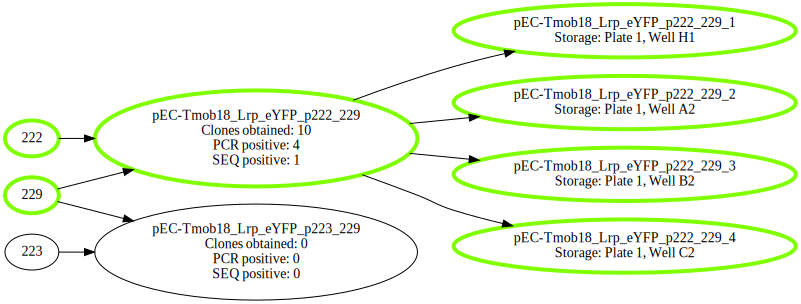

In [19]:
tp_graph = tp.create_dag(
    include_properties=['primerA', 'primerB'],
    include_constructs=['pEC-Tmob18_Lrp_eYFP_p222_229', 'pEC-Tmob18_Lrp_eYFP_p223_229'],
)
tp_graph

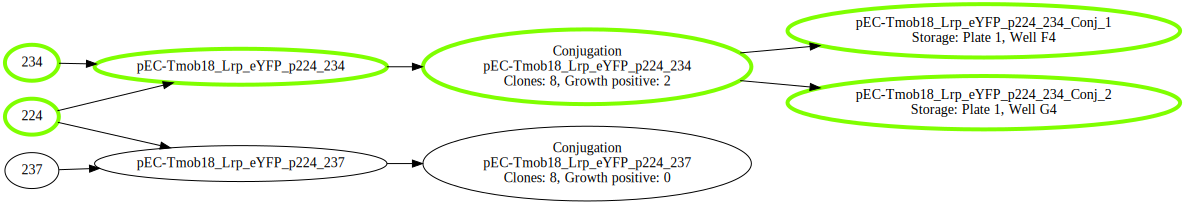

In [20]:
cp_graph = cp.create_dag(
    include_properties=['primerA', 'primerB'],
    include_constructs=['pEC-Tmob18_Lrp_eYFP_p224_237', 'pEC-Tmob18_Lrp_eYFP_p224_234'],
)
cp_graph

Finally, we do some clean-up for the next run. Do not execute this cell if you want to have a look at the template files.

In [21]:
for f in pathlib.Path('templates').glob('*_template.xlsx'):
    f.unlink()